# Predict animals shelter outcomes

In [2]:
## All the required libraries are attached here:

import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [3]:
df =  pd.read_csv('train.csv')
#y = df['OutcomeType']
#df = df.drop('OutcomeType', axis =1)
df_test = pd.read_csv('test.csv')

#df_test = df_test.drop('ID', axis =1)
#df = pd.concat([df,df_test])

df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
print "Length of training dataset: " + str(df.size)
print "Length of testing dataset: " + str(df_test.size)
print "Names of the columns given: " 
print df.columns. values

print df.describe()

Length of training dataset: 267290
Length of testing dataset: 91648
Names of the columns given: 
['AnimalID' 'Name' 'DateTime' 'OutcomeType' 'OutcomeSubtype' 'AnimalType'
 'SexuponOutcome' 'AgeuponOutcome' 'Breed' 'Color']
       AnimalID   Name             DateTime OutcomeType OutcomeSubtype  \
count     26729  19038                26729       26729          13117   
unique    26729   6374                22918           5             16   
top     A705677    Max  2015-08-11 00:00:00    Adoption        Partner   
freq          1    136                   19       10769           7816   

       AnimalType SexuponOutcome AgeuponOutcome                   Breed  \
count       26729          26728          26711                   26729   
unique          2              5             44                    1380   
top           Dog  Neutered Male         1 year  Domestic Shorthair Mix   
freq        15595           9779           3969                    8810   

              Color  
count   

## Problem statement and Evaluation metrics

We are provided with a dataset of length 267290 as the trainins dataset. And dataset of length 91648 as teh testing dataset. We are going to keep them as they are right now but will later scarmble the data for further testing. 

We OutcomeType is the y column for our dataset i.e. it is the feature we are trying to predict. The features we are provided with to predict the Y values: 

'AnimalID' 'Name' 'DateTime' 'OutcomeType' 'OutcomeSubtype' 'AnimalType'
 'SexuponOutcome' 'AgeuponOutcome' 'Breed' 'Color'
 
 Columns like AnimalID and Name don't give us a lot of information with the data given as it is. Columns like the  AgeUponOutcome columns have inconsistent scale for the data. Datetime column can be divided further to give more meaningful information. Breed and color information needs to be filtered and wrangled fruther to get relevant information from it and discard information that might not be useful to us. We can try and use other sources to distinguish between other the animal breeds further. All this will be addressed in the data wrangling section. 
 
 For evaluating the data I will be following the metric same as that provided in kaggle, the log loss method for multiclass classification. This will give us a good benchmark to classify the data as well.

## Exploratory Data Analysis

### Data Exploration and Wrangling

Lets tackle this dataset one column at a time.
Starting with the first the AnimalID column. Based on my observation, It seems like the  first three characters of the AnimalID. But the each animal gets an unique ID. LEts filter the data to just include the first three characters and see if there is any correlation ebtween that and the outcome. This is just on a hunch , and if a correlation might just be a fluke correlation.

In [5]:
df['AnimalCommonID'] = df['AnimalID'].apply(lambda x: x[:3])

In [6]:
df_test

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
5,6,Beau,2015-06-23 11:17:00,Dog,Neutered Male,3 years,Beagle Mix,Brown/White
6,7,Bobo,2014-03-12 09:45:00,Cat,Neutered Male,13 years,Domestic Medium Hair Mix,Brown Tabby/White
7,8,Abby,2014-06-25 08:27:00,Cat,Spayed Female,6 months,Domestic Shorthair Mix,Brown Tabby
8,9,Ruby Grace,2014-11-12 18:05:00,Dog,Spayed Female,3 months,Cairn Terrier,Black/Cream
9,10,Ruby,2014-04-07 17:41:00,Dog,Spayed Female,1 year,Pit Bull Mix,Brown/White


We can see that now we just have the first three characters of the animalID. Lets move onto the Name category. Here it looks like some animals have been given names and some have not. We can check if the animals with names have a higher chance of a +ve outcome. 

In [7]:
df['IfName'] = ~df['Name'].isnull()

df_test['IfName'] = ~df_test['Name'].isnull()

Now the Names column has False where there is a Name and True where ther is not. Next is the datetime column. We will be spliting it into two one that give the date and one that give time of the day.

In [8]:
df.dtypes

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
AnimalCommonID    object
IfName              bool
dtype: object

In [9]:
import datetime as dt
temp = pd.DatetimeIndex(df['DateTime'])
temp_test = pd.DatetimeIndex(df_test['DateTime'])


def timeOfday(x):
    if  0 <= int(x) < 12:
        return 'Morning'
    elif 12 <= int(x) < 13:
        return 'Noon'
    elif 13 <= int(x) < 17:
        return 'AfterNoon'
    elif 17 <= int(x) < 21:
        return 'Evening'
    elif 21 <= int(x) < 24:
        return 'Night'
    else:
        print "Error"


In [10]:

hours = pd.Series(temp.hour)
df['TimeofDay'] = hours.apply(lambda X: timeOfday(X))
df['Time'] = temp.time
df['Date'] = temp.date
df['Day'] = temp.weekday
df['Month'] = temp.month

hours_test = pd.Series(temp_test.hour)
df_test['TimeofDay'] = hours.apply(lambda X: timeOfday(X))
df_test['Date'] = temp_test.date
df_test['Day'] = temp_test.weekday
df_test['Month'] = temp_test.month


Now we split datetime into date and time. We will delete the datetime column and move onto the next column that is the OutcomeSubtype. We dont need to make anychanges here , since it gives in part the reason for the outcome for the animal. The column after that i.e. the Animal type also does not need any changes make to it. Sex upon outcome does need to split into female/male and intact/(spayed/neutered) columns. This way we can understand if the gender and reproduction ability makes any difference in the outcome for the animal.

In [11]:
def splt(x):
    if len(str.split(str(x))) > 1:
        return str.split(str(x))[1]
    else:
        return 'Unknown'
    

In [12]:
df['Sex'] = df['SexuponOutcome'].apply(lambda X: splt(X))
df['Repro'] = df['SexuponOutcome'].apply(lambda X: str.split(str(X))[0])

df_test['Sex'] = df_test['SexuponOutcome'].apply(lambda X: splt(X))
df_test['Repro'] = df_test['SexuponOutcome'].apply(lambda X: str.split(str(X))[0])



In [13]:
def spltAge(x):
    Agelist = str.split(str(x))
    if Agelist[0] == 'nan':
        return 0
    d = Agelist[1]
    n = Agelist[0]
    if d == "year":
        return 365
    elif d == "years":
        return (int(n) * 365)
    elif d == "month":
        return (30)
    elif d == "months":
        return (int(n) * 30)
    elif d == "week":
        return (7)
    elif d == "weeks":
        return (int(n) * 7)
    else:
        return int(n)

In [14]:
df['Age'] = df['AgeuponOutcome'].apply(lambda X: spltAge(X))

df_test['Age'] = df_test['AgeuponOutcome'].apply(lambda X: spltAge(X))

Now we have the Age is days so we can compare across the outcomes. Next we can work on cleaning the breed type. Here we can see that there are both purebred and mix breed animals. We can create two column one which says if the animal is purebred or not and one which gives the first occuring breed for the animal. If there is a string 'mix' or symbol '/' then we set the ifmix column value as true else we set it as false. If '/' symbol exists then we consider the breed from the first half of '/' symbol.

In [15]:

def spltmix(x):
    if ('/' in str(x)) or ('Mix' in str(x)):
        return 0
    else:
        return 1

def spltbreed(x):
    if ('/' in str(x)):
        return str(x).split('/')[0]
    elif ('Mix' in str(x)):
        return str(x).rsplit(' ', 1)[0]
    else:
        return str(x)

df['IfMix'] = df['Breed'].apply(lambda X: spltmix(X))
df['BreedName'] = df['Breed'].apply(lambda X: spltbreed(X))


df_test['IfMix'] = df_test['Breed'].apply(lambda X: spltmix(X))
df_test['BreedName'] = df_test['Breed'].apply(lambda X: spltbreed(X))

    

Now that breed type has been taken care of we can consider the color. We use similar filters as the breed type. We just consider the color before '/'.

In [16]:
def spltcolor(x):
    if('/' in str(x)):
        return str(x).split('/')[0]
    else:
        return str(x)

df['ColorTyp'] = df['Color'].apply(lambda X: spltcolor(X))

df_test['ColorTyp'] = df_test['Color'].apply(lambda X: spltcolor(X))

In [17]:
df_test

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,IfName,TimeofDay,Date,Day,Month,Sex,Repro,Age,IfMix,BreedName,ColorTyp
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,True,Evening,2015-10-12,0,10,Female,Intact,300,0,Labrador Retriever,Red
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,True,Noon,2014-07-26,5,7,Female,Spayed,730,0,German Shepherd,Black
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,True,Noon,2016-01-13,2,1,Male,Neutered,365,0,Domestic Shorthair,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,True,Evening,2013-12-28,5,12,Male,Intact,120,0,Collie Smooth,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,True,Noon,2015-09-24,3,9,Male,Neutered,730,0,Miniature Poodle,White
5,6,Beau,2015-06-23 11:17:00,Dog,Neutered Male,3 years,Beagle Mix,Brown/White,True,AfterNoon,2015-06-23,1,6,Male,Neutered,1095,0,Beagle,Brown
6,7,Bobo,2014-03-12 09:45:00,Cat,Neutered Male,13 years,Domestic Medium Hair Mix,Brown Tabby/White,True,AfterNoon,2014-03-12,2,3,Male,Neutered,4745,0,Domestic Medium Hair,Brown Tabby
7,8,Abby,2014-06-25 08:27:00,Cat,Spayed Female,6 months,Domestic Shorthair Mix,Brown Tabby,True,Evening,2014-06-25,2,6,Female,Spayed,180,0,Domestic Shorthair,Brown Tabby
8,9,Ruby Grace,2014-11-12 18:05:00,Dog,Spayed Female,3 months,Cairn Terrier,Black/Cream,True,Evening,2014-11-12,2,11,Female,Spayed,90,1,Cairn Terrier,Black
9,10,Ruby,2014-04-07 17:41:00,Dog,Spayed Female,1 year,Pit Bull Mix,Brown/White,True,Morning,2014-04-07,0,4,Female,Spayed,365,0,Pit Bull,Brown


We will delete the older columns we do not require.

In [18]:
ndf  = df.drop(['AnimalID','Name','DateTime','SexuponOutcome','AgeuponOutcome','Breed','Color'],axis = 1)
y = df['OutcomeType']

ndf_test  = df_test.drop(['Name','DateTime','SexuponOutcome','AgeuponOutcome','Breed','Color'],axis = 1)

ndf.head()

,OutcomeType,OutcomeSubtype,AnimalType,AnimalCommonID,IfName,TimeofDay,Time,Date,Day,Month,Sex,Repro,Age,IfMix,BreedName,ColorTyp
0,Return_to_owner,NaN,Dog,A67,True,Evening,18:22:00,2014-02-12,2,2,Male,Neutered,365,0,Shetland Sheepdog,Brown
1,Euthanasia,Suffering,Cat,A65,True,Noon,12:44:00,2013-10-13,6,10,Female,Spayed,365,0,Domestic Shorthair,Cream Tabby
2,Adoption,Foster,Dog,A68,True,Noon,12:28:00,2015-01-31,5,1,Male,Neutered,730,0,Pit Bull,Blue
3,Transfer,Partner,Cat,A68,False,Evening,19:09:00,2014-07-11,4,7,Male,Intact,21,0,Domestic Shorthair,Blue Cream
4,Transfer,Partner,Dog,A66,False,Noon,12:52:00,2013-11-15,4,11,Male,Neutered,730,0,Lhasa Apso,Tan


In [19]:
ndf.describe(include = 'all')

,OutcomeType,OutcomeSubtype,AnimalType,AnimalCommonID,IfName,TimeofDay,Time,Date,Day,Month,Sex,Repro,Age,IfMix,BreedName,ColorTyp
count,26729,13117,26729,26729,26729,26729,26729,26729,26729.000000,26729.000000,26729,26729,26729.000000,26729.000000,26729,26729
unique,5,16,2,61,2,5,849,874,NaN,NaN,3,5,NaN,NaN,220,57
top,Adoption,Partner,Dog,A70,True,AfterNoon,09:00:00,2014-07-12,NaN,NaN,Male,Neutered,NaN,NaN,Domestic Shorthair,Black
freq,10769,7816,15595,4710,19038,10640,996,129,NaN,NaN,13304,9779,NaN,NaN,8958,6422
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.106364,6.925736,NaN,NaN,793.595982,0.052041,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.046002,3.495779,NaN,NaN,1082.661580,0.222114,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN,NaN,60.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,7.000000,NaN,NaN,365.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,10.000000,NaN,NaN,1095.000000,0.000000,NaN,NaN


### Data visualisation and statistics

Now that we have cleaned all the required data, We can go ahead an plot it, based on the plots we can clean the data up further. or gather some insights to useage of algorithms.

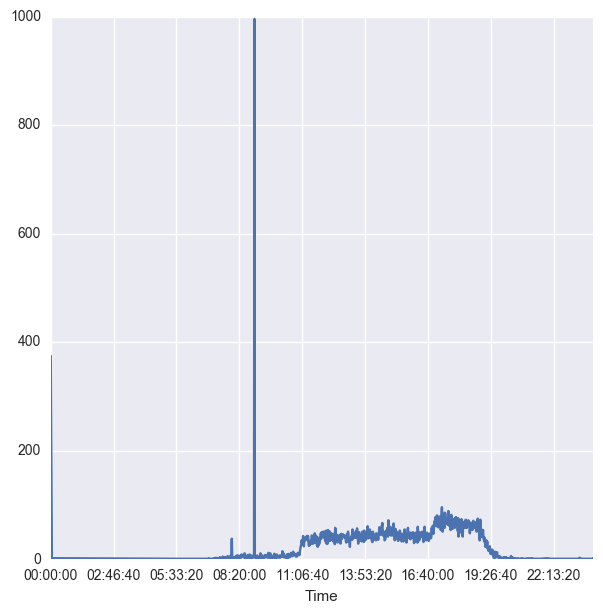

In [20]:

import seaborn as sns
%matplotlib inline
TimePlot = plt.figure(figsize = (7,7))
time  = ndf['Time']
time = time.groupby(time).count()
time.plot()
TimePlot.savefig("TimePlot.png")


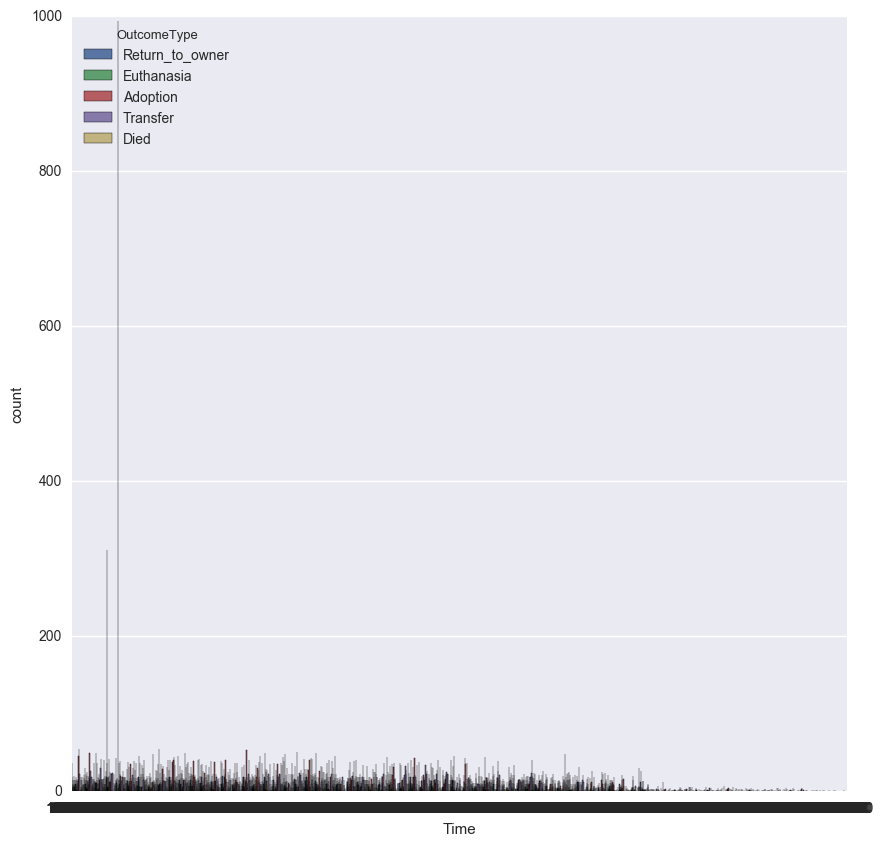

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='Time', data =ndf, hue='OutcomeType')

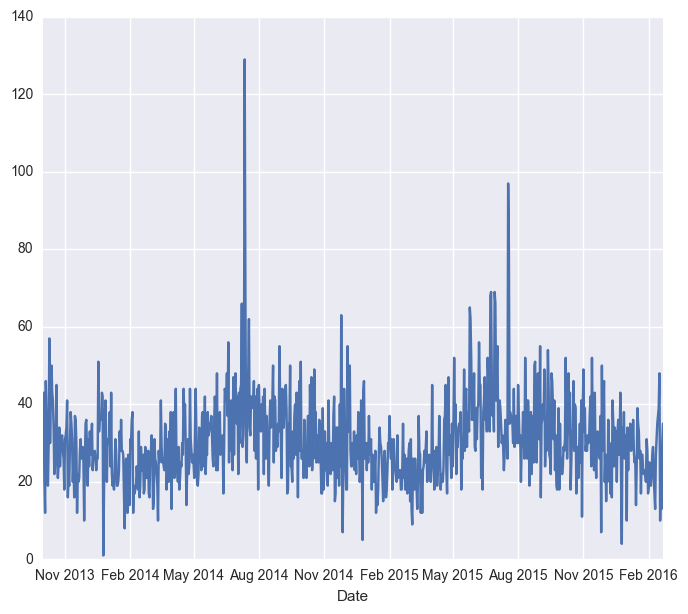

In [22]:
#date  = ndf['Date']
DatePlot = plt.figure(figsize = (8,7))
date = ndf['Date']
date = date.groupby(date).count()
date.plot()
DatePlot.savefig("DatePlot.png")

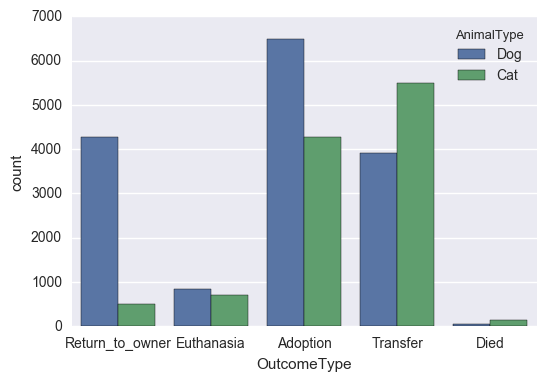

In [23]:
#sns.countplot(x='OutcomeType', data =ndf, palette="Greens_d")
AnimalType = sns.countplot(x='OutcomeType', data =ndf, hue='AnimalType')
AnimalType = AnimalType.get_figure()
AnimalType.savefig("AnimalType.png")

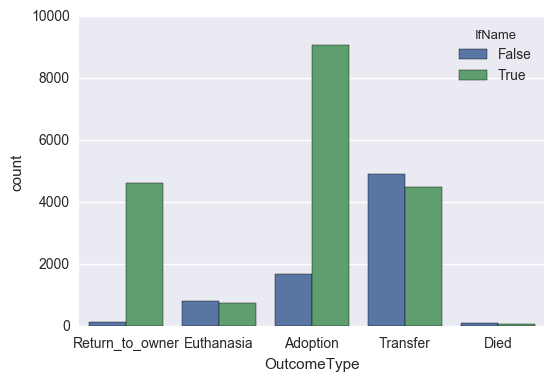

In [24]:
sns.countplot(x = 'OutcomeType', data =ndf, hue ='IfName')

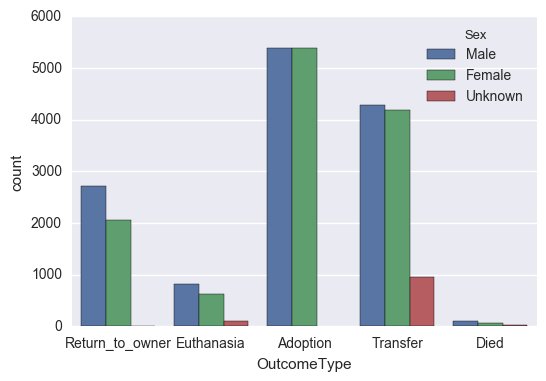

In [25]:
Gender = sns.countplot(x = 'OutcomeType', data =ndf, hue ='Sex')
Gender = Gender.get_figure()
Gender.savefig("Gender.png")

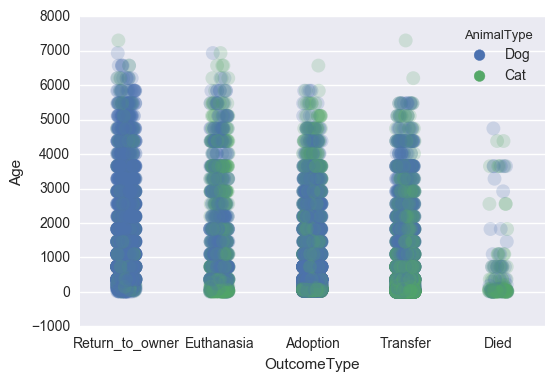

In [26]:
sns.stripplot(x = 'OutcomeType', y = 'Age', hue = 'AnimalType', data = ndf, jitter = True, alpha =0.2, size = 10)

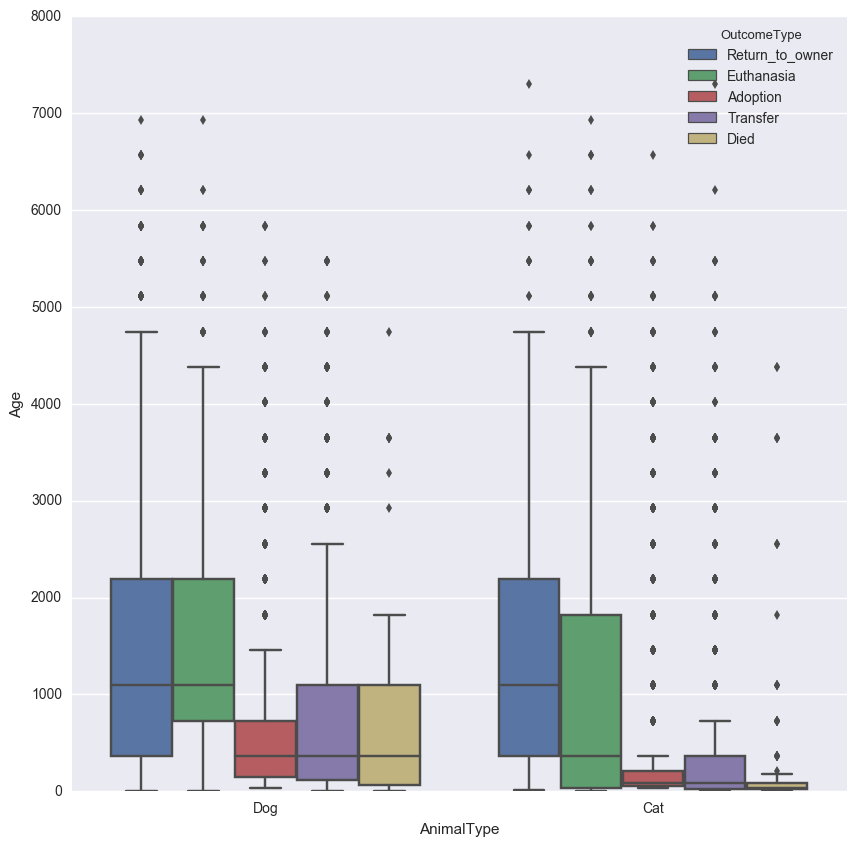

In [27]:
plt.figure(figsize=(10,10))
Age = sns.boxplot(y = 'Age', x = 'AnimalType',hue = "OutcomeType", data= ndf)
Age = Age.get_figure()
Age.savefig("Age.png")

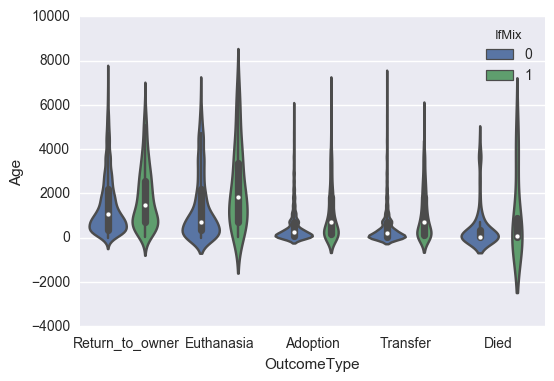

In [28]:
#sns.countplot( x = 'OutcomeType', data =ndf, hue ='IfMix')
Mix = sns.violinplot(y='Age',x = 'OutcomeType', data =ndf, hue ='IfMix')
Mix = Mix.get_figure()
Mix.savefig("Mix.png")


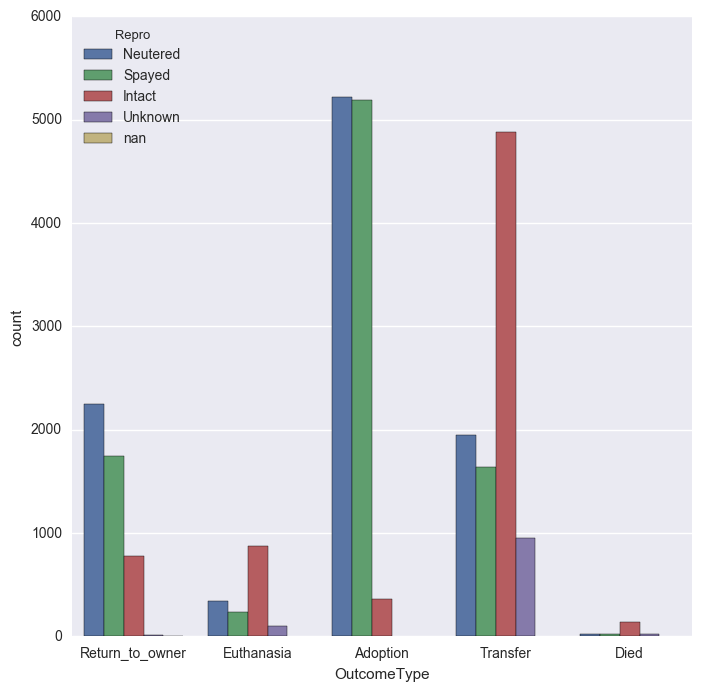

In [29]:
plt.figure(figsize=(8,8))
Repro = sns.countplot(x = 'OutcomeType', hue = 'Repro', data = ndf)
Repro = Repro.get_figure()
Repro.savefig("Repro.png")


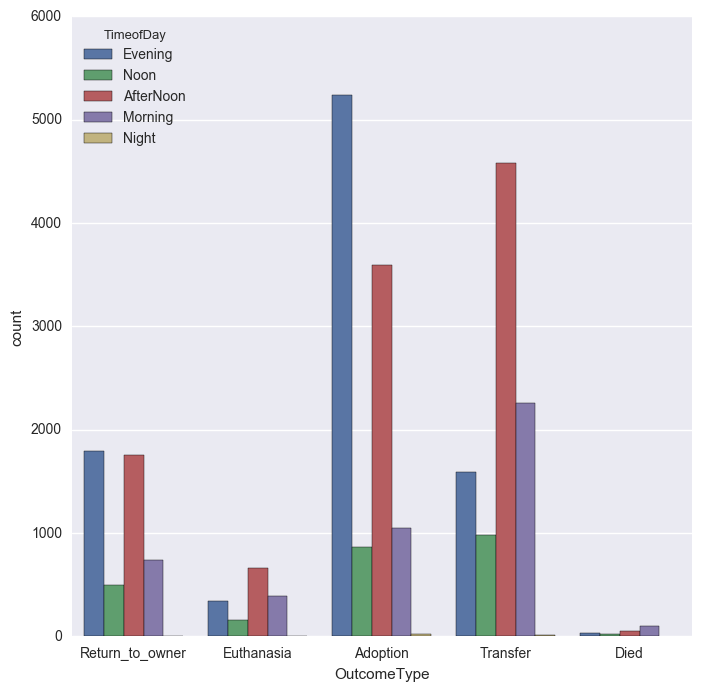

In [30]:
plt.figure(figsize=(8,8))
TimeofDay = sns.countplot(x = 'OutcomeType', hue = 'TimeofDay', data = ndf)
TimeofDay = TimeofDay.get_figure()
TimeofDay.savefig("TimeofDay.png")


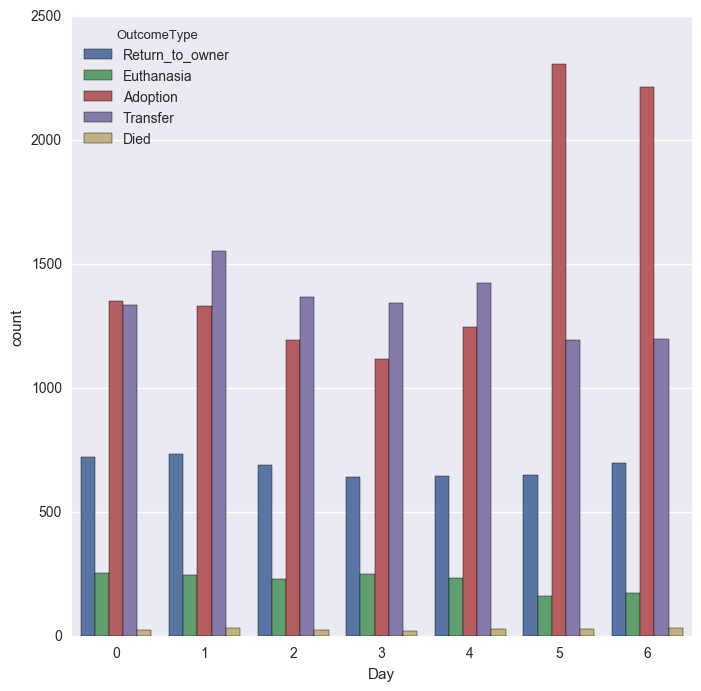

In [31]:
plt.figure(figsize=(8,8))
WeekDay = sns.countplot(hue = 'OutcomeType', x = 'Day', data = ndf)
WeekDay = WeekDay.get_figure()
WeekDay.savefig("WeekDay.png")


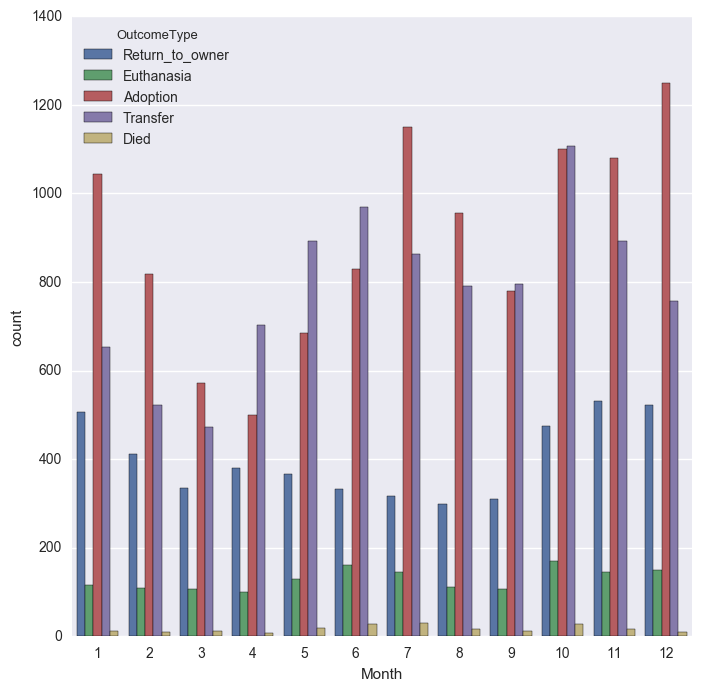

In [32]:
plt.figure(figsize=(8,8))
Month = sns.countplot(hue = 'OutcomeType', x = 'Month', data = ndf)
Month = Month.get_figure()
Month.savefig("Month.png")


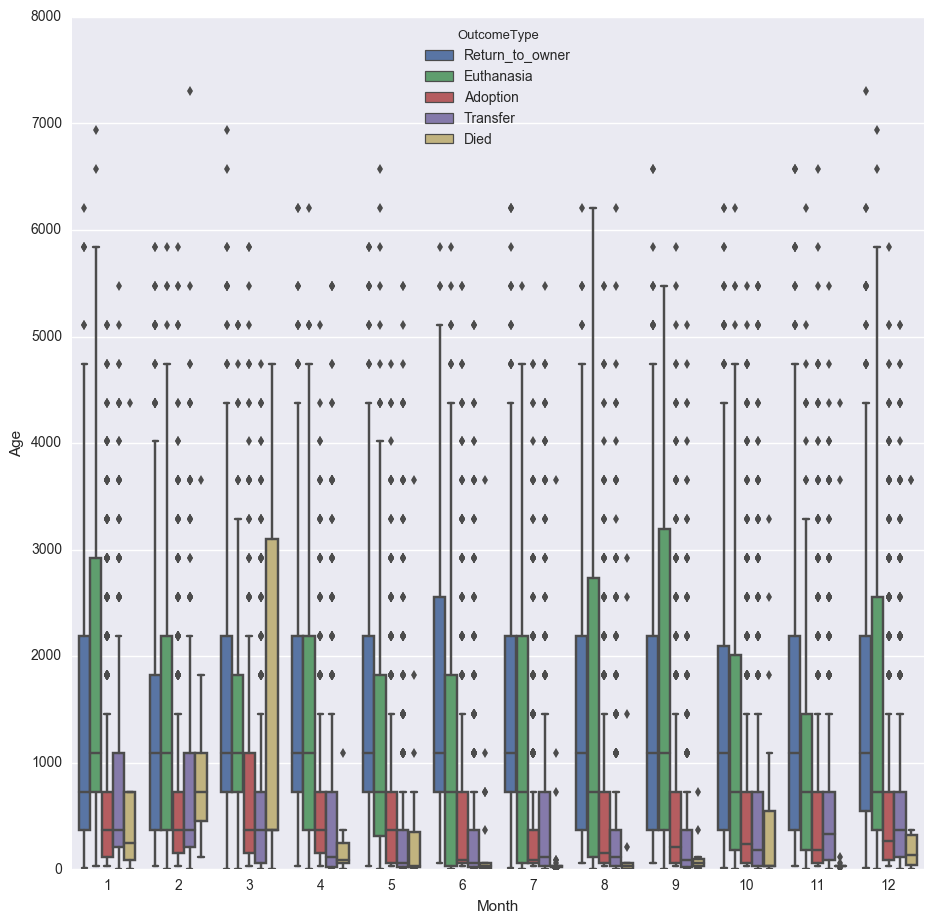

In [33]:
plt.figure(figsize=(11,11))
Month = sns.boxplot(hue = 'OutcomeType', x = 'Month',y = 'Age', data = ndf)
Month = Month.get_figure()
Month.savefig("MonthAge.png")

## Algorithms and technique

### Algorithms under consideration

Lets try using Decision tree classifier for baseline classification.
Then we will move to Random forest or Naive bayes classifier. 




In [34]:
from sklearn import tree
from sklearn import preprocessing
ndf_test.head()

,ID,AnimalType,IfName,TimeofDay,Date,Day,Month,Sex,Repro,Age,IfMix,BreedName,ColorTyp
0,1,Dog,True,Evening,2015-10-12,0,10,Female,Intact,300,0,Labrador Retriever,Red
1,2,Dog,True,Noon,2014-07-26,5,7,Female,Spayed,730,0,German Shepherd,Black
2,3,Cat,True,Noon,2016-01-13,2,1,Male,Neutered,365,0,Domestic Shorthair,Brown Tabby
3,4,Dog,True,Evening,2013-12-28,5,12,Male,Intact,120,0,Collie Smooth,Tricolor
4,5,Dog,True,Noon,2015-09-24,3,9,Male,Neutered,730,0,Miniature Poodle,White


### Final Algorithm and outcome

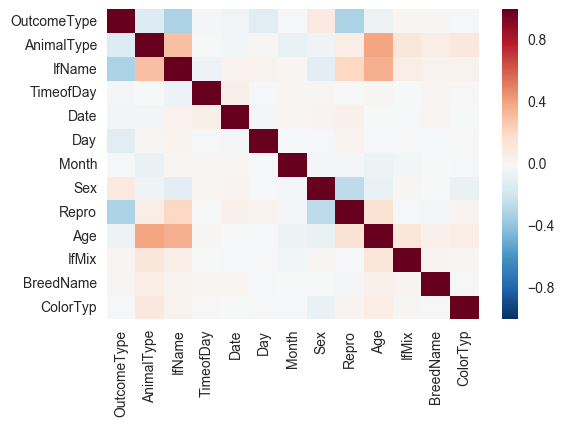

In [35]:

## Do label encoming for string data:
le = preprocessing.LabelEncoder()
ndf['TimeofDay'] = le.fit_transform(ndf['TimeofDay'])
ndf['AnimalType'] = le.fit_transform(ndf['AnimalType'])
#ndf['OutcomeSubtype'] = le.fit_transform(ndf['OutcomeSubtype'])
ndf['Sex'] = le.fit_transform(ndf['Sex'])
ndf['Repro'] = le.fit_transform(ndf['Repro'])
ndf['Date'] = le.fit_transform(ndf['Date'])
ndf['IfName'] = le.fit_transform(ndf['IfName'])
ndf['ColorTyp'] = le.fit_transform(ndf['ColorTyp'])
ndf['BreedName'] = le.fit_transform(ndf['BreedName'])
ndf['OutcomeType'] = le.fit_transform(ndf['OutcomeType'])


ndf_test['TimeofDay'] = le.fit_transform(ndf_test['TimeofDay'])
ndf_test['AnimalType'] = le.fit_transform(ndf_test['AnimalType'])
#ndf_test['OutcomeSubtype'] = le.fit_transform(ndf_test['OutcomeSubtype'])
ndf_test['Sex'] = le.fit_transform(ndf_test['Sex'])
ndf_test['Repro'] = le.fit_transform(ndf_test['Repro'])
ndf_test['Date'] = le.fit_transform(ndf_test['Date'])
ndf_test['IfName'] = le.fit_transform(ndf_test['IfName'])
ndf_test['ColorTyp'] = le.fit_transform(ndf_test['ColorTyp'])
ndf_test['BreedName'] = le.fit_transform(ndf_test['BreedName'])


#print(ndf.columns)
corr = ndf.corr(method='spearman')
corr = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr = corr.get_figure()
corr.savefig("corr.png")

#ndf  = ndf.drop(['OutcomeType','ColorTyp','BreedName','Time','AnimalCommonID','OutcomeSubtype'], axis =1)

ndf  = ndf.drop(['OutcomeType','Time','AnimalCommonID','OutcomeSubtype'], axis =1)

#ndf_test  = ndf_test.drop(['ColorTyp','BreedName','ID'], axis =1)
ndf_test  = ndf_test.drop(['ID'], axis =1)



y = le.fit_transform(df['OutcomeType'])

In [36]:
##Take a look at what the data looks like after labeling

d =  dict(zip(le.classes_, np.arange(len(le.classes_))))

print ndf.head()
print ndf_test.head()

#ndf['TimeofDay'] = LabelEncoder.fit_transform(ndf['TimeofDay'])

   AnimalType  IfName  TimeofDay  Date  Day  Month  Sex  Repro  Age  IfMix  \
0           1       1          1   134    2      2    1      1  365      0   
1           0       1          4    12    6     10    0      2  365      0   
2           1       1          4   487    5      1    1      1  730      0   
3           0       0          1   283    4      7    1      0   21      0   
4           1       0          4    45    4     11    1      1  730      0   

   BreedName  ColorTyp  
0        181        15  
1         80        26  
2        159         7  
3         80         8  
4        127        49  
   AnimalType  IfName  TimeofDay  Date  Day  Month  Sex  Repro  Age  IfMix  \
0           1       1          1   741    0     10    0      0  300      0   
1           1       1          4   298    5      7    0      2  730      0   
2           0       1          4   833    2      1    1      1  365      0   
3           1       1          1    88    5     12    1      0  120  

In [37]:
#Run the initial decision tree classifier for benchmarking purpose.
clf = tree.DecisionTreeClassifier()
clf  = clf.fit(ndf, y)

In [38]:
Values = clf.predict_proba(ndf_test)
print Values.shape
Values = pd.DataFrame(Values)
colnames = Values.columns.values

Values['ID'] = range(1,Values.shape[0]+1, 1)
for key, value in d.iteritems():
    Values.rename(columns = {value:key}, inplace = True)
    
print Values.columns.values
#print Values
print ndf_test.shape

#plt.plot(clf, log="y")
#varImpPlot(clf)



(11456, 5)
['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer' 'ID']
(11456, 12)


In [39]:
#Save the results of the decision tree classifier.
Values.to_csv("Result_DecisionTree.csv", index = False)
#np.savetxt("Result.csv", Values, delimiter=",", fmt= "%1.6f")

In [135]:
#Run Random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=600)
clf = clf.fit(ndf, y)

Values = clf.predict_proba(ndf_test)

Values = pd.DataFrame(Values)
colnames = Values.columns.values

Values['ID'] = range(1,Values.shape[0]+1, 1)
for key, value in d.iteritems():
    Values.rename(columns = {value:key}, inplace = True)
Values.to_csv("Result_RandomForest.csv", index = False)
   

Feature ranking:
1. feature 8 (0.182854)
2. feature 3 (0.165582)
3. feature 7 (0.121568)
4. feature 10 (0.102947)
5. feature 11 (0.091075)
6. feature 5 (0.090723)
7. feature 4 (0.078900)
8. feature 2 (0.055892)
9. feature 1 (0.047872)
10. feature 6 (0.029861)
11. feature 0 (0.023494)
12. feature 9 (0.009232)


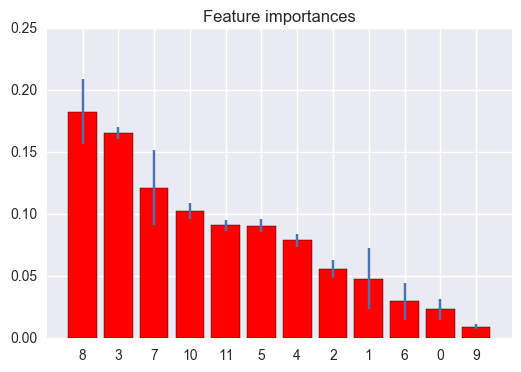

In [136]:
##Gather the features by importance in Random forest classifier.
clf.feature_importances_

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(ndf.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig  = plt.figure()
plt.title("Feature importances")
plt.bar(range(ndf.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(ndf.shape[1]), indices)
plt.xlim([-1, ndf.shape[1]])
plt.savefig('FeatureImp.png') 

plt.show()
#plt.savefig('FeatureImp.png') 
#plt.save("FeatureImp.png")
#corr = corr.get_figure()
#corr.savefig("corr.png")


In [137]:
#Do grid search for the data. first combining the data, then running grid search on Random Search parameters. 
#These are the sample Grid parameters we used. the CV functin were tried  using different combinations of grid params.
param_grid_randomized = {"max_depth": range(1,10,1),
              "max_features": range(1,10,1),
              "min_samples_split": range(2,10,1),
              "min_samples_leaf": range(1,10,1),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

param_grid = {"max_depth": [3,6,10],
              "max_features": [3,6,8,10],
              "min_samples_split": [3,6,10],
              "min_samples_leaf": [3,6,10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [138]:
#Run RandomizedSearchCV
#grid_search = GridSearchCV(clf, param_grid=param_grid)
#start = time()
#grid_search.fit(ndf, y)

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_grid_randomized,
                                   n_iter=n_iter_search)
clf = random_search.fit(ndf,y)
Values = clf.predict_proba(ndf_test)

Values = pd.DataFrame(Values)
colnames = Values.columns.values

Values['ID'] = range(1,Values.shape[0]+1, 1)
for key, value in d.iteritems():
    Values.rename(columns = {value:key}, inplace = True)
Values.to_csv("Result_RandomizedCV.csv", index = False)


In [139]:
##Printing the best parameters

#print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
 #     % (time() - start, len(grid_search.cv_results_['params'])))
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.663 (std: 0.003)
Parameters: {'bootstrap': False, 'min_samples_leaf': 2, 'max_features': 6, 'criterion': 'entropy', 'min_samples_split': 8, 'max_depth': 7}

Model with rank: 2
Mean validation score: 0.662 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'max_features': 7, 'criterion': 'entropy', 'min_samples_split': 9, 'max_depth': 7}

Model with rank: 3
Mean validation score: 0.658 (std: 0.003)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'max_features': 7, 'criterion': 'gini', 'min_samples_split': 3, 'max_depth': 6}



In [467]:
# run grid search
clf = RandomForestClassifier(n_estimators=600)
grid_search = GridSearchCV(clf, param_grid=param_grid_randomized,verbose=2)

In [ ]:
#start = time()
grid_search = grid_search.fit(ndf, y)
Values = grid_search.predict_proba(ndf_test)

Values = pd.DataFrame(Values)
colnames = Values.columns.values

Values['ID'] = range(1,Values.shape[0]+1, 1)
for key, value in d.iteritems():
    Values.rename(columns = {value:key}, inplace = True)
Values.to_csv("Result_GridSearchCV.csv", index = False)

In [45]:
print "We are done with the gridsearchCV function!!"

We are done with the gridsearchCV function!!


In [417]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.671 (std: 0.004)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 8, 'max_depth': 10}

Model with rank: 2
Mean validation score: 0.671 (std: 0.004)
Parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 6, 'max_depth': 10}

Model with rank: 3
Mean validation score: 0.671 (std: 0.004)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 8, 'max_depth': 10}



Since we are using Random forest algorithm we do not need to use Cross validation on the given dataset. 

In [424]:
# Tuned parameters from randomized searchCV
#Parameters: {'bootstrap': False, 
#             'min_samples_leaf': 7, 'max_features': 5, 'criterion': 'gini', 'min_samples_split': 9, 'max_depth': 9}
clf = RandomForestClassifier(n_estimators=600, 
                             bootstrap = False, 
                             min_samples_leaf = 7, 
                             max_features =5, 
                             criterion = 'gini', 
                             min_samples_split=9, 
                             max_depth = 9)
clf = clf.fit(ndf, y)

Values = clf.predict_proba(ndf_test)

Values = pd.DataFrame(Values)
colnames = Values.columns.values

Values['ID'] = range(1,Values.shape[0]+1, 1)
for key, value in d.iteritems():
    Values.rename(columns = {value:key}, inplace = True)
Values.to_csv("Result_TunedRandomForest.csv", index = False)
 

In [425]:
clf.feature_importances_

array([ 0.05654925,  0.12430732,  0.06386392,  0.02430337,  0.03558835,
        0.00971614,  0.04365504,  0.33448831,  0.27765061,  0.0017872 ,
        0.02150113,  0.00658937])

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
print ndf.shape
print y.shape

y = pd.DataFrame(y)

k_fold = KFold(10)
clf = RandomForestClassifier(n_estimators=600, 
                             bootstrap = False, 
                             min_samples_leaf = 7, 
                             max_features =5, 
                             criterion = 'gini', 
                             min_samples_split=9, 
                             max_depth = 9)

for k, (train_index, test_index) in enumerate(k_fold.split(ndf, y)):
    #print k, ndf[train,:], ndf[test,:]
    X_train, X_test = ndf.ix[train_index], ndf.ix[test_index]
    Y_train, Y_test = y.ix[train_index], y.ix[test_index]
    clf.fit(X_train, Y_train)
    print clf.score(X_test,Y_test)
    


(26729, 12)
(26729, 1)


/Users/AknownMouse/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.676393565282
0.671530115975
0.664796109241
0.662925551814
0.68125701459
0.665170220726
0.652450430228
0.677890011223
0.679386457164
0.669910179641


## References

http://english.stackexchange.com/questions/28498/precise-names-for-parts-of-a-day

http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html

https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://stackoverflow.com/questions/26489961/python-rank-order-correlation-for-categorical-data

https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

https://www.kaggle.com/c/shelter-animal-outcomes/leaderboard

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

https://en.wikipedia.org/wiki/Random_forest

http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/

http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html